In [1]:
pip install transformers torch pandas scikit-learn


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
!pip install googletrans==3.1.0a0
!pip install langdetect

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 931.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=654d460029f0f0261a772f64359afd1907f41689c5cc0847ade20ef426341cfa
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

In [3]:
!pip install transformers[torch] -U


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.2
    Uninstalling transformers-4.41.2:
      Successfully uninstalled transformers-4.41.2


In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

In [5]:
# List of dataset paths (Provided in the Colab runtime environment)
dataset_paths = [
    '/content/raw_i3-13100.csv',
    '/content/raw_i3-13100F.csv',
    '/content/raw_i5-13400.csv',
    '/content/raw_i5-13400F.csv',
    '/content/raw_i5-13500.csv',
    '/content/raw_i5-13600K.csv',
    '/content/raw_i5-13600KF.csv',
    '/content/raw_i7-13700.csv',
    '/content/raw_i7-13700F.csv',
    '/content/raw_i7-13700K.csv',
    '/content/raw_i7-13700KF.csv',
    '/content/raw_i9-13900.csv',
    '/content/raw_i9-13900F.csv',
    '/content/raw_i9-13900K.csv',
    '/content/raw_i9-13900KF.csv'
]

In [6]:
# Load and concatenate all datasets
print("Loading and concatenating datasets...")
dataframes = [pd.read_csv(path) for path in dataset_paths]
df = pd.concat(dataframes, ignore_index=True)
print("Datasets loaded and concatenated successfully.")

Loading and concatenating datasets...
Datasets loaded and concatenated successfully.


In [7]:
df.head()

id    profileName  \
0   RHTTI4K2DPHY0   David Porras   
1  R37FKXT8R7YH91      G. Burton   
2   R86XV2FG1BA9T    JoeteckTips   
3   RKSCPTOR1PN3Q             JJ   
4  R3TUGEVQGFSX9R  Machining Man   

                                                text  \
0  El menor de su familia y se defiende muy bien,...   
1  This is a Great entry level processor that wor...   
2  I build PCs for clients daily. The core i3-131...   
3  If you need more processor, buy more processor...   
4  The 13100 isn't the powerhouse that the 13900k...   

                                                date  \
0      Reviewed in the United States on July 9, 2023   
1  Reviewed in the United States on February 6, 2024   
2  Reviewed in the United States on September 14,...   
3      Reviewed in the United States on May 13, 2023   
4     Reviewed in the United States on July 13, 2023   

                                title              rating  \
0    Va bastante bien, es un guerrero  5.0 out of 5 stars   
1        Great Entry Level Processor!  5.0 out of 5 stars   
2  These are perfect for office buids  5.0 out of 5 stars   
3             Great bang for the buck  5.0 out of 5 stars   
4            Good value for the money  4.0 out of 5 stars   

                                              images  helpful variant:style  \
0  https://m.media-amazon.com/images/I/61DuAjLRpr...        0     Processor   
1                                                NaN        0     Processor   
2                                                NaN        0     Processor   
3                                                NaN        4     Processor   
4                                                NaN        0     Processor   

   variant:  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [8]:
import nltk
nltk.download('stopwords')
# Set of English words
english_words = set(stopwords.words('english'))
# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase and remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
    return text.strip()


# Function to detect language
def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except LangDetectException:
        return 'unknown'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
# Function to translate text to English
def translate_to_english(text, source_lang):
    translator = Translator()
    try:
        translated = translator.translate(text, src=source_lang, dest='en')
        return translated.text
    except Exception as e:
        print(f"Translation error: {e}")
        return None

In [10]:
# Function to check if text is mostly English
def is_english(text):
    words_in_text = set(text.split())
    if not words_in_text:  # Check if the set is empty
        return False
    english_words_in_text = words_in_text & english_words
    return len(english_words_in_text) / len(words_in_text) > 0.5  # Threshold to determine English text


In [11]:
# Function to analyze text: detect language, translate if necessary, and compute sentiment
def analyze_text(text):
    cleaned_text = preprocess_text(text)
    if is_english(cleaned_text):
        language = 'en'
        translated_text = text  # No need to translate if already English
    else:
        language = detect_language(text)
        if language == 'unknown':
            translated_text = None
        else:
            translated_text = translate_to_english(text, language)
            # Ensure translated_text is a string to avoid TypeError
            translated_text = translated_text if translated_text is not None else ""

    blob = TextBlob(translated_text)
    sentiment = blob.sentiment.polarity
    return pd.Series([language, sentiment, translated_text])

In [12]:


from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from googletrans import Translator
# Apply the function to create new columns
df[['language', 'sentiment', 'translated_text']] = df['text'].apply(analyze_text)

# Step 2: Separate English and non-English texts
df_english = df[df['language'] == 'en']
df_non_english = df[df['language'] != 'en']

# Print summary
print(df['language'].value_counts())
print("\nSample of English texts:")
print(df_english[['text', 'sentiment']].head())
print("\nSample of non-English texts:")
print(df_non_english[['text', 'sentiment', 'language', 'translated_text']].head())

# Optional: Calculate average sentiment by language
avg_sentiment = df.groupby('language')['sentiment'].mean().sort_values(ascending=False)
print("\nAverage sentiment by language:")
print(avg_sentiment)

language
en    736
es     93
ja     55
fr     24
pt     14
it     13
de     11
da      7
so      4
ca      4
ro      4
af      3
nl      2
no      2
cy      1
sk      1
sw      1
et      1
sq      1
tl      1
fi      1
Name: count, dtype: int64

Sample of English texts:
                                                text  sentiment
1  This is a Great entry level processor that wor...   0.397500
2  I build PCs for clients daily. The core i3-131...   0.428571
3  If you need more processor, buy more processor...   0.271364
4  The 13100 isn't the powerhouse that the 13900k...   0.400000
5  Used it in a fresh build on MSI Mortar wifi an...   0.110317

Sample of non-English texts:
                                                 text  sentiment language  \
0   El menor de su familia y se defiende muy bien,...   0.600000       es   
7   Procesador Intel muy bueno, excelente sistema ...   0.853333       es   
8                                               merci   0.000000       es   
9      

In [13]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
from nltk.tokenize import word_tokenize
# Function to clean text for ML models
def clean_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply the cleaning function to the 'translated_text' column
df['cleaned_text'] = df['translated_text'].apply(clean_text)

# Display the cleaned text
print(df[['translated_text', 'cleaned_text']].head())

                                     translated_text  \
0  The youngest of his family and he defends hims...   
1  This is a Great entry level processor that wor...   
2  I build PCs for clients daily. The core i3-131...   
3  If you need more processor, buy more processor...   
4  The 13100 isn't the powerhouse that the 13900k...   

                                        cleaned_text  
0  youngest family defends well goes perfect rtx ...  
1  great entry level processor works like expensi...  
2  build pcs clients daily core i313100 absolutel...  
3  need processor buy processor however web surfe...  
4  13100 isnt powerhouse 13900k works well day da...  


In [15]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.1 MB/s eta 0:00:00


In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores using VADER
def get_sentiment_scores_vader(cleaned_text):
    return analyzer.polarity_scores(cleaned_text)

                                        cleaned_text  neg    neu    pos  \
0  youngest family defends well goes perfect rtx ...  0.0  0.608  0.392   
1  great entry level processor works like expensi...  0.0  0.466  0.534   
2  build pcs clients daily core i313100 absolutel...  0.0  0.800  0.200   
3  need processor buy processor however web surfe...  0.0  0.781  0.219   
4  13100 isnt powerhouse 13900k works well day da...  0.0  0.692  0.308   

   compound  
0    0.7003  
1    0.8834  
2    0.9184  
3    0.8689  
4    0.5994  
              neg         neu         pos    compound
count  979.000000  979.000000  979.000000  979.000000
mean     0.058099    0.655711    0.286197    0.468761
std      0.114612    0.225262    0.232388    0.457803
min      0.000000    0.000000    0.000000   -0.945300
25%      0.000000    0.533500    0.124000    0.139800
50%      0.000000    0.687000    0.244000    0.624900
75%      0.079000    0.794000    0.404000    0.836000
max      1.000000    1.000000    

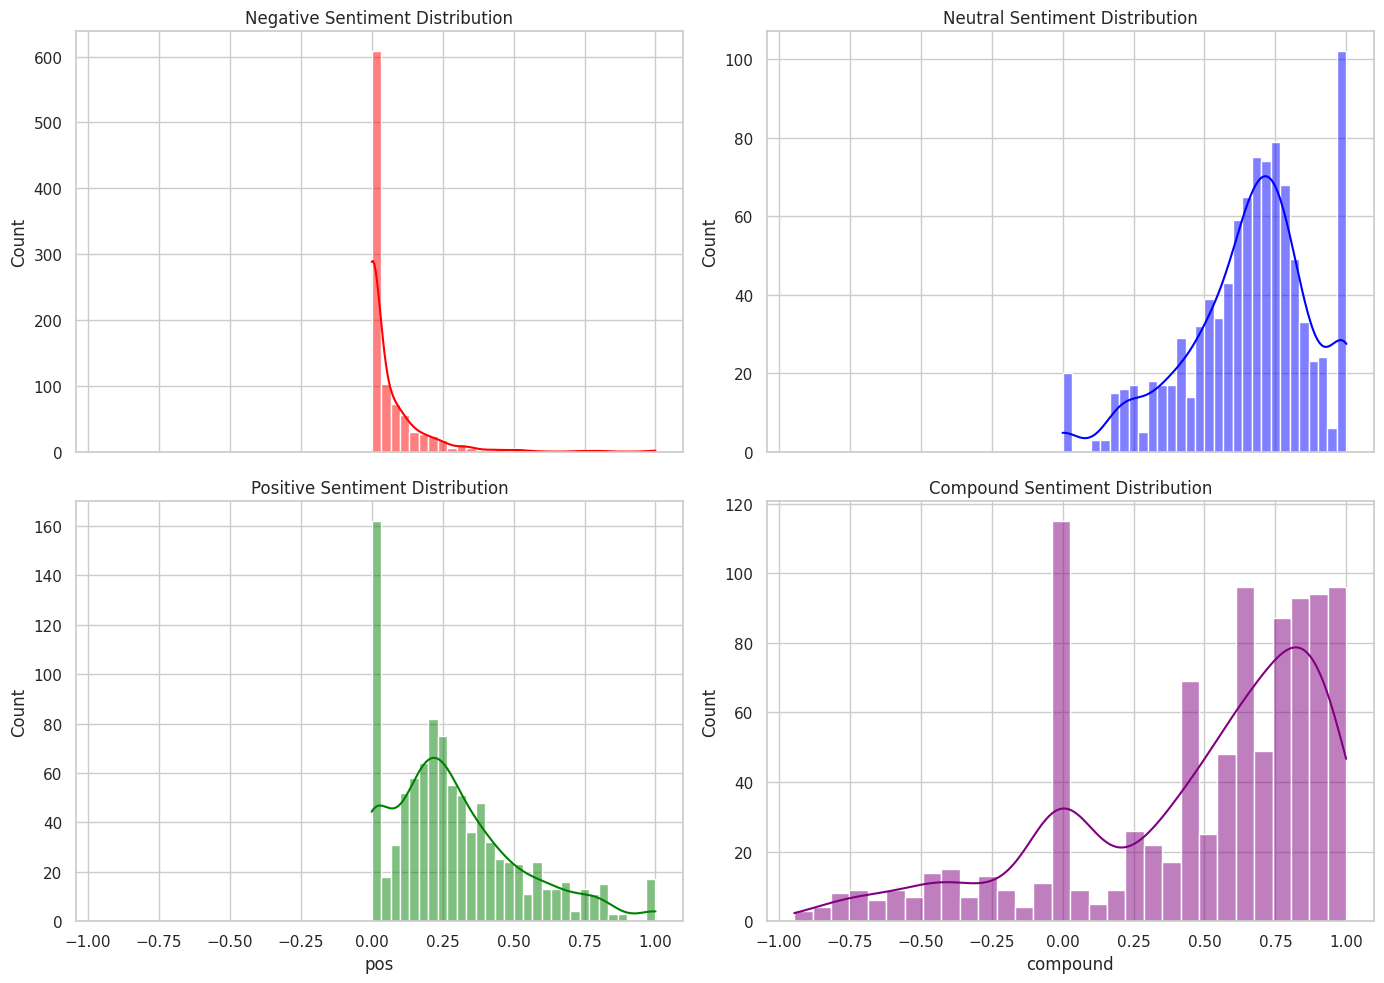

In [17]:
# Apply the function to the cleaned text
df['sentiment_scores_vader'] = df['cleaned_text'].apply(get_sentiment_scores_vader)

# Split the sentiment scores into separate columns
df = pd.concat([df.drop(['sentiment_scores_vader'], axis=1), df['sentiment_scores_vader'].apply(pd.Series)], axis=1)

# Display the results
print(df[['cleaned_text', 'neg', 'neu', 'pos', 'compound']].head())

# Display basic statistics of sentiment scores
print(df[['neg', 'neu', 'pos', 'compound']].describe())

# Set the style of the visualization
sns.set(style="whitegrid")

# Create subplots for VADER sentiment scores
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Plot negative sentiment scores
sns.histplot(df['neg'], bins=30, kde=True, color='red', ax=axes[0, 0])
axes[0, 0].set_title('Negative Sentiment Distribution')

# Plot neutral sentiment scores
sns.histplot(df['neu'], bins=30, kde=True, color='blue', ax=axes[0, 1])
axes[0, 1].set_title('Neutral Sentiment Distribution')

# Plot positive sentiment scores
sns.histplot(df['pos'], bins=30, kde=True, color='green', ax=axes[1, 0])
axes[1, 0].set_title('Positive Sentiment Distribution')

# Plot compound sentiment scores
sns.histplot(df['compound'], bins=30, kde=True, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Compound Sentiment Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

From the graphs, we can see that there are very less negative reviews present in the dataset and more psotive reviews are there and there are many reviews which comes under compound category which is nothing but the mixture of all sentiments.

sentiment_category_vader
positive    744
negative    118
neutral     117
Name: count, dtype: int64


<ipython-input-18-f3f2004c587a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category_vader', data=df, palette=['green', 'blue', 'red'])


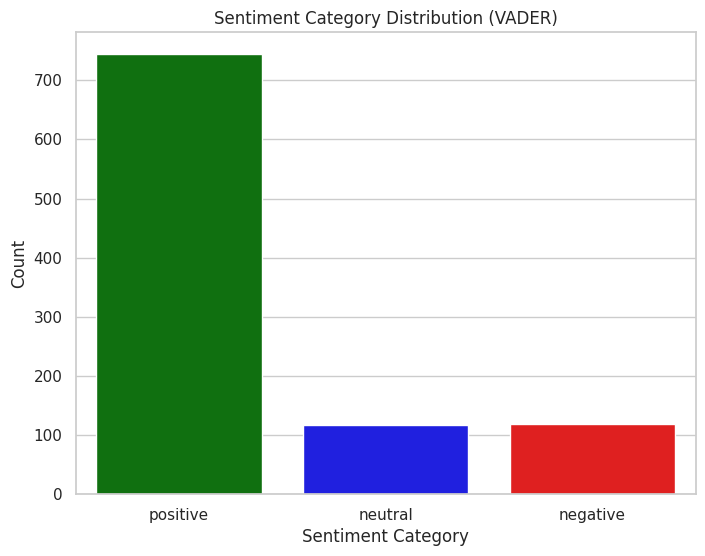

In [18]:
# Function to categorize sentiment using VADER
def categorize_sentiment_vader(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the categorization function to the compound scores
df['sentiment_category_vader'] = df['compound'].apply(categorize_sentiment_vader)

# Display the sentiment category counts for VADER
print(df['sentiment_category_vader'].value_counts())

# Create a bar plot for sentiment categories using VADER
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category_vader', data=df, palette=['green', 'blue', 'red'])
plt.title('Sentiment Category Distribution (VADER)')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

From the graph, we can see that there are many postive reviews. There are very few negative reviews about the 13th Gen processors and very few neutral reviews.

In [19]:
# Initialize the tokenizer and model
print("Initializing tokenizer and model...")
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
print("Tokenizer and model initialized.")

Initializing tokenizer and model...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Tokenizer and model initialized.


The above code snippet initializes a tokenizer and a model using the DistilBERT architecture for natural language processing tasks. The tokenizer, DistilBertTokenizer, is loaded from the pre-trained 'distilbert-base-uncased' model, and it converts text into tokens suitable for model input. The model, DistilBertForSequenceClassification, is a pre-trained version fine-tuned on the SST-2 dataset for sentiment analysis, specifically 'distilbert-base-uncased-finetuned-sst-2-english'. The process begins with a print statement indicating initialization and concludes with another confirming successful setup.

In [20]:
df.head()

id    profileName  \
0   RHTTI4K2DPHY0   David Porras   
1  R37FKXT8R7YH91      G. Burton   
2   R86XV2FG1BA9T    JoeteckTips   
3   RKSCPTOR1PN3Q             JJ   
4  R3TUGEVQGFSX9R  Machining Man   

                                                text  \
0  El menor de su familia y se defiende muy bien,...   
1  This is a Great entry level processor that wor...   
2  I build PCs for clients daily. The core i3-131...   
3  If you need more processor, buy more processor...   
4  The 13100 isn't the powerhouse that the 13900k...   

                                                date  \
0      Reviewed in the United States on July 9, 2023   
1  Reviewed in the United States on February 6, 2024   
2  Reviewed in the United States on September 14,...   
3      Reviewed in the United States on May 13, 2023   
4     Reviewed in the United States on July 13, 2023   

                                title              rating  \
0    Va bastante bien, es un guerrero  5.0 out of 5 stars   
1        Great Entry Level Processor!  5.0 out of 5 stars   
2  These are perfect for office buids  5.0 out of 5 stars   
3             Great bang for the buck  5.0 out of 5 stars   
4            Good value for the money  4.0 out of 5 stars   

                                              images  helpful variant:style  \
0  https://m.media-amazon.com/images/I/61DuAjLRpr...        0     Processor   
1                                                NaN        0     Processor   
2                                                NaN        0     Processor   
3                                                NaN        4     Processor   
4                                                NaN        0     Processor   

   variant: language  sentiment  \
0       NaN       es   0.600000   
1       NaN       en   0.397500   
2       NaN       en   0.428571   
3       NaN       en   0.271364   
4       NaN       en   0.400000   

                                     translated_text  \
0  The youngest of his family and he defends hims...   
1  This is a Great entry level processor that wor...   
2  I build PCs for clients daily. The core i3-131...   
3  If you need more processor, buy more processor...   
4  The 13100 isn't the powerhouse that the 13900k...   

                                        cleaned_text  neg    neu    pos  \
0  youngest family defends well goes perfect rtx ...  0.0  0.608  0.392   
1  great entry level processor works like expensi...  0.0  0.466  0.534   
2  build pcs clients daily core i313100 absolutel...  0.0  0.800  0.200   
3  need processor buy processor however web surfe...  0.0  0.781  0.219   
4  13100 isnt powerhouse 13900k works well day da...  0.0  0.692  0.308   

   compound sentiment_category_vader  
0    0.7003                 positive  
1    0.8834                 positive  
2    0.9184                 positive  
3    0.8689                 positive  
4    0.5994                 positive

In [21]:
# Function to preprocess text for tokenizer
def preprocess_text(cleaned_text):
    return tokenizer(cleaned_text, padding=True, truncation=True, return_tensors='pt')

In the above code snippet, the preprocess_text function tokenizes input text using the DistilBERT tokenizer. It pads the text to a uniform length, truncates it if necessary, and converts it into PyTorch tensors, making the text ready for model input.

In [22]:

# Function to predict sentiment
def predict_sentiment(tokenized_input):
    with torch.no_grad():
        outputs = model(**tokenized_input)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=1).item()
        return predicted_class


In the above code snippet, the predict_sentiment function takes tokenized text, disables gradient calculation for efficiency, passes the text through the model to get prediction scores (logits), finds the highest score to determine the predicted sentiment class, and returns this class.

In [23]:
# Tokenize and predict sentiment for all reviews
print("Tokenizing and predicting sentiment for reviews...")
tokens = [preprocess_text(text) for text in df['cleaned_text']]
df['sentiment'] = [predict_sentiment(tokens[i]) for i in range(len(tokens))]
print("Sentiment prediction complete.")

Tokenizing and predicting sentiment for reviews...
Sentiment prediction complete.


The above code tokenizes each review in the DataFrame df, predicts their sentiment, and stores the results in a new 'sentiment' column, with print statements indicating the start and completion of the process.

In [24]:
# Save the DataFrame with sentiments
df.to_csv('reviews_with_sentiment_all.csv', index=False)
print("Sentiment data saved to 'reviews_with_sentiment_all.csv'.")

Sentiment data saved to 'reviews_with_sentiment_all.csv'.


The above code saves the sentiments and processed dataset to csv file and stores it.

In [25]:
# Reload the DataFrame with sentiments
df = pd.read_csv("reviews_with_sentiment_all.csv")

The above code snippet does the work of loading the processed dataset to the variable df.

In [26]:
df.head()

id    profileName  \
0   RHTTI4K2DPHY0   David Porras   
1  R37FKXT8R7YH91      G. Burton   
2   R86XV2FG1BA9T    JoeteckTips   
3   RKSCPTOR1PN3Q             JJ   
4  R3TUGEVQGFSX9R  Machining Man   

                                                text  \
0  El menor de su familia y se defiende muy bien,...   
1  This is a Great entry level processor that wor...   
2  I build PCs for clients daily. The core i3-131...   
3  If you need more processor, buy more processor...   
4  The 13100 isn't the powerhouse that the 13900k...   

                                                date  \
0      Reviewed in the United States on July 9, 2023   
1  Reviewed in the United States on February 6, 2024   
2  Reviewed in the United States on September 14,...   
3      Reviewed in the United States on May 13, 2023   
4     Reviewed in the United States on July 13, 2023   

                                title              rating  \
0    Va bastante bien, es un guerrero  5.0 out of 5 stars   
1        Great Entry Level Processor!  5.0 out of 5 stars   
2  These are perfect for office buids  5.0 out of 5 stars   
3             Great bang for the buck  5.0 out of 5 stars   
4            Good value for the money  4.0 out of 5 stars   

                                              images  helpful variant:style  \
0  https://m.media-amazon.com/images/I/61DuAjLRpr...        0     Processor   
1                                                NaN        0     Processor   
2                                                NaN        0     Processor   
3                                                NaN        4     Processor   
4                                                NaN        0     Processor   

   variant: language  sentiment  \
0       NaN       es          1   
1       NaN       en          1   
2       NaN       en          0   
3       NaN       en          1   
4       NaN       en          0   

                                     translated_text  \
0  The youngest of his family and he defends hims...   
1  This is a Great entry level processor that wor...   
2  I build PCs for clients daily. The core i3-131...   
3  If you need more processor, buy more processor...   
4  The 13100 isn't the powerhouse that the 13900k...   

                                        cleaned_text  neg    neu    pos  \
0  youngest family defends well goes perfect rtx ...  0.0  0.608  0.392   
1  great entry level processor works like expensi...  0.0  0.466  0.534   
2  build pcs clients daily core i313100 absolutel...  0.0  0.800  0.200   
3  need processor buy processor however web surfe...  0.0  0.781  0.219   
4  13100 isnt powerhouse 13900k works well day da...  0.0  0.692  0.308   

   compound sentiment_category_vader  
0    0.7003                 positive  
1    0.8834                 positive  
2    0.9184                 positive  
3    0.8689                 positive  
4    0.5994                 positive

In [27]:
# Display basic information and check for missing values
print("DataFrame information:")
print(df.info())
print("\nMissing values in each column:")
print(df.isnull().sum())

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        979 non-null    object 
 1   profileName               979 non-null    object 
 2   text                      979 non-null    object 
 3   date                      979 non-null    object 
 4   title                     979 non-null    object 
 5   rating                    979 non-null    object 
 6   images                    104 non-null    object 
 7   helpful                   979 non-null    int64  
 8   variant:style             819 non-null    object 
 9   variant:                  0 non-null      float64
 10  language                  979 non-null    object 
 11  sentiment                 979 non-null    int64  
 12  translated_text           979 non-null    object 
 13  cleaned_text              979 non-null    

From the above result of the code which provides basic information of the datasets, we can infer that there are some missing values in the dataset and in the next step we are removing those columns as they are of no use for us.

In [28]:
# Drop the images column
df.drop(columns=['images'], inplace=True)
df.drop(columns=['variant:style'], inplace=True)
df.drop(columns=['variant:'], inplace = True)

In [29]:
df.head() #Printing the first five rows of the dataset

id    profileName  \
0   RHTTI4K2DPHY0   David Porras   
1  R37FKXT8R7YH91      G. Burton   
2   R86XV2FG1BA9T    JoeteckTips   
3   RKSCPTOR1PN3Q             JJ   
4  R3TUGEVQGFSX9R  Machining Man   

                                                text  \
0  El menor de su familia y se defiende muy bien,...   
1  This is a Great entry level processor that wor...   
2  I build PCs for clients daily. The core i3-131...   
3  If you need more processor, buy more processor...   
4  The 13100 isn't the powerhouse that the 13900k...   

                                                date  \
0      Reviewed in the United States on July 9, 2023   
1  Reviewed in the United States on February 6, 2024   
2  Reviewed in the United States on September 14,...   
3      Reviewed in the United States on May 13, 2023   
4     Reviewed in the United States on July 13, 2023   

                                title              rating  helpful language  \
0    Va bastante bien, es un guerrero  5.0 out of 5 stars        0       es   
1        Great Entry Level Processor!  5.0 out of 5 stars        0       en   
2  These are perfect for office buids  5.0 out of 5 stars        0       en   
3             Great bang for the buck  5.0 out of 5 stars        4       en   
4            Good value for the money  4.0 out of 5 stars        0       en   

   sentiment                                    translated_text  \
0          1  The youngest of his family and he defends hims...   
1          1  This is a Great entry level processor that wor...   
2          0  I build PCs for clients daily. The core i3-131...   
3          1  If you need more processor, buy more processor...   
4          0  The 13100 isn't the powerhouse that the 13900k...   

                                        cleaned_text  neg    neu    pos  \
0  youngest family defends well goes perfect rtx ...  0.0  0.608  0.392   
1  great entry level processor works like expensi...  0.0  0.466  0.534   
2  build pcs clients daily core i313100 absolutel...  0.0  0.800  0.200   
3  need processor buy processor however web surfe...  0.0  0.781  0.219   
4  13100 isnt powerhouse 13900k works well day da...  0.0  0.692  0.308   

   compound sentiment_category_vader  
0    0.7003                 positive  
1    0.8834                 positive  
2    0.9184                 positive  
3    0.8689                 positive  
4    0.5994                 positive

In [30]:
# Descriptive statistics
print("\nDescriptive statistics:")
numeric_stats = df.describe()
print(numeric_stats)


Descriptive statistics:
          helpful   sentiment         neg         neu         pos    compound
count  979.000000  979.000000  979.000000  979.000000  979.000000  979.000000
mean     3.962206    0.399387    0.058099    0.655711    0.286197    0.468761
std     14.649818    0.490023    0.114612    0.225262    0.232388    0.457803
min      0.000000    0.000000    0.000000    0.000000    0.000000   -0.945300
25%      0.000000    0.000000    0.000000    0.533500    0.124000    0.139800
50%      0.000000    0.000000    0.000000    0.687000    0.244000    0.624900
75%      4.000000    1.000000    0.079000    0.794000    0.404000    0.836000
max    394.000000    1.000000    1.000000    1.000000    1.000000    0.999000


In [31]:
# Extract year from the date
def extract_year(date_str):
    match = re.search(r'\d{4}', date_str)
    return match.group(0) if match else None

print("Extracting year from date column...")
df['date'] = df['date'].apply(extract_year).astype(float)
print("Year extraction complete.")

Extracting year from date column...
Year extraction complete.


In [32]:
# Extract numerical rating from the rating string
def extract_rating(rating_str):
    rating_match = re.search(r'(\d+\.\d+)', rating_str)
    return float(rating_match.group(1)) if rating_match else None

print("Extracting numerical rating from rating column...")
df['rating'] = df['rating'].apply(extract_rating)
print("Rating extraction complete.")

Extracting numerical rating from rating column...
Rating extraction complete.


In [33]:
df.head()

id    profileName  \
0   RHTTI4K2DPHY0   David Porras   
1  R37FKXT8R7YH91      G. Burton   
2   R86XV2FG1BA9T    JoeteckTips   
3   RKSCPTOR1PN3Q             JJ   
4  R3TUGEVQGFSX9R  Machining Man   

                                                text    date  \
0  El menor de su familia y se defiende muy bien,...  2023.0   
1  This is a Great entry level processor that wor...  2024.0   
2  I build PCs for clients daily. The core i3-131...  2023.0   
3  If you need more processor, buy more processor...  2023.0   
4  The 13100 isn't the powerhouse that the 13900k...  2023.0   

                                title  rating  helpful language  sentiment  \
0    Va bastante bien, es un guerrero     5.0        0       es          1   
1        Great Entry Level Processor!     5.0        0       en          1   
2  These are perfect for office buids     5.0        0       en          0   
3             Great bang for the buck     5.0        4       en          1   
4            Good value for the money     4.0        0       en          0   

                                     translated_text  \
0  The youngest of his family and he defends hims...   
1  This is a Great entry level processor that wor...   
2  I build PCs for clients daily. The core i3-131...   
3  If you need more processor, buy more processor...   
4  The 13100 isn't the powerhouse that the 13900k...   

                                        cleaned_text  neg    neu    pos  \
0  youngest family defends well goes perfect rtx ...  0.0  0.608  0.392   
1  great entry level processor works like expensi...  0.0  0.466  0.534   
2  build pcs clients daily core i313100 absolutel...  0.0  0.800  0.200   
3  need processor buy processor however web surfe...  0.0  0.781  0.219   
4  13100 isnt powerhouse 13900k works well day da...  0.0  0.692  0.308   

   compound sentiment_category_vader  
0    0.7003                 positive  
1    0.8834                 positive  
2    0.9184                 positive  
3    0.8689                 positive  
4    0.5994                 positive

In [34]:
# Create polarity, review length, and word count columns
print("Performing additional analysis on polarity, review length, and word count...")
df['polarity'] = df['cleaned_text'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['cleaned_text'].astype(str).apply(len)
df['word_count'] = df['cleaned_text'].apply(lambda x: len(str(x).split()))

Performing additional analysis on polarity, review length, and word count...


Generating violin plot for sentiment vs rating...


<ipython-input-35-c232225d4b09>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='sentiment', y='rating', palette='muted')


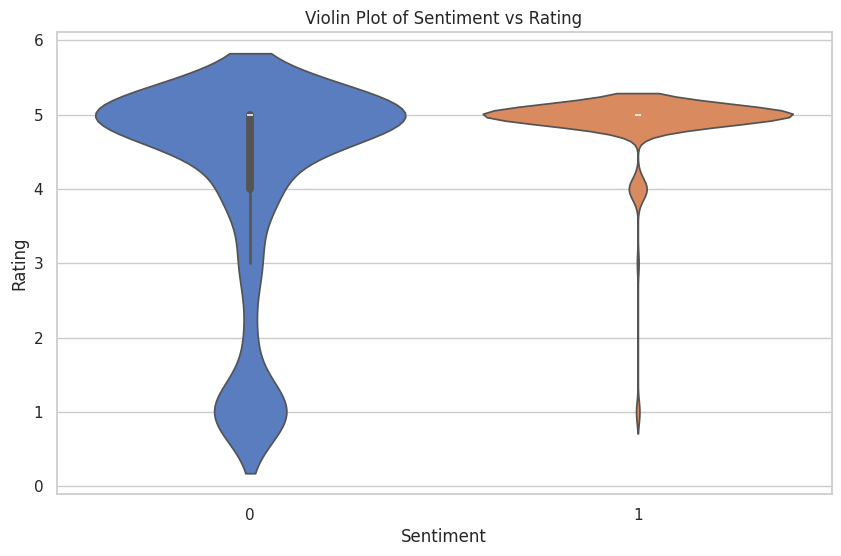

In [35]:
# Violin Plot for sentiment vs rating
print("Generating violin plot for sentiment vs rating...")
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='sentiment', y='rating', palette='muted')
plt.title('Violin Plot of Sentiment vs Rating')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()

Most of the sentiments are spread in 5 for positive reviews and for negative reviews the spread can be observed in 1 to 2 rating and 5

In [36]:
# Correlation Matrix
print("Calculating correlation matrix...")
correlation_matrix = df[['rating', 'sentiment']].corr()
print("Correlation Matrix:")
correlation_matrix

Calculating correlation matrix...
Correlation Matrix:


rating  sentiment
rating     1.000000   0.309583
sentiment  0.309583   1.000000

Generating histogram for date distribution...


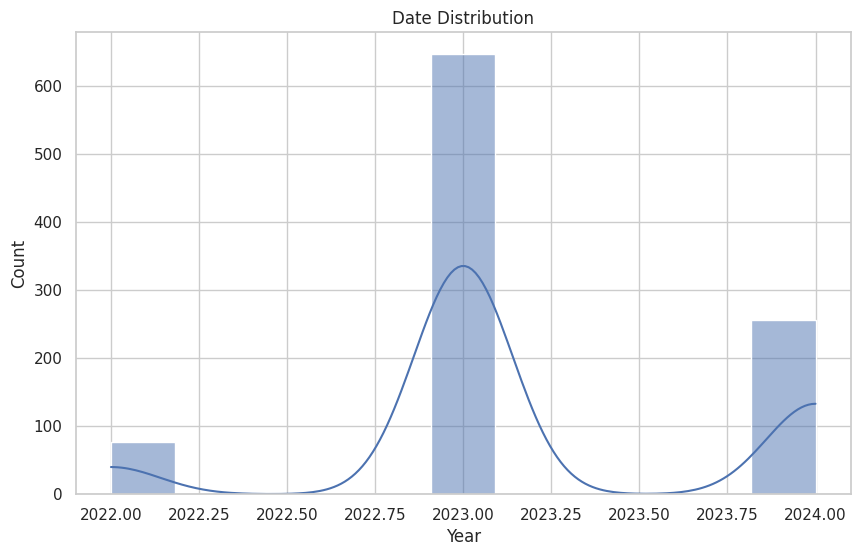

In [37]:
# Histogram of Dates
print("Generating histogram for date distribution...")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='date', kde=True)
plt.title('Date Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

From the graph, we can say that more purchases are made in the year 2023

Performing yearly sentiment analysis...


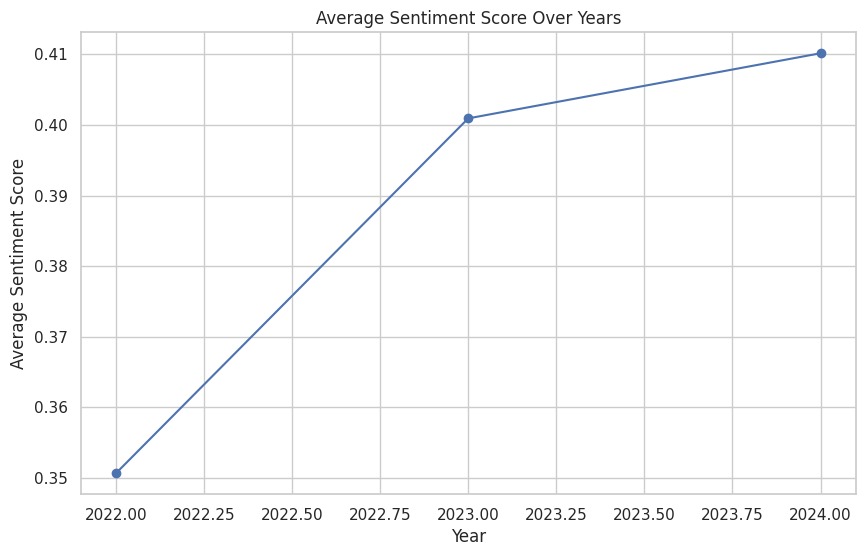

In [38]:
# Yearly sentiment analysis
print("Performing yearly sentiment analysis...")
df['year'] = pd.to_datetime(df['date'], format='%Y')
yearly_sentiment = df.groupby(df['year'].dt.year)['sentiment'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_sentiment['year'], yearly_sentiment['sentiment'], marker='o')
plt.title('Average Sentiment Score Over Years')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

From the above graph, we can infer that year 2022 has more sentiment score and gradually the sentiment score decreased.

Generating word cloud for all reviews...


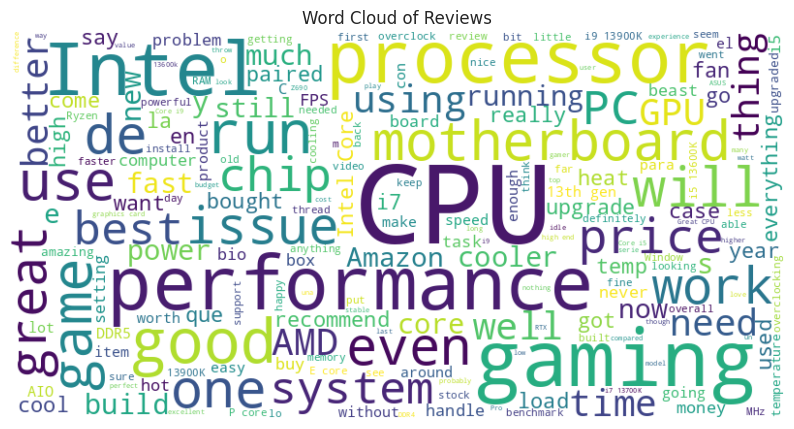

In [39]:
# Word Cloud
print("Generating word cloud for all reviews...")
all_reviews = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

The above word cloud shows how many times a word is used in the review statemnet based on the size of it, for example CPU, Intel, Performance, gaming, processors are mostly commonly used words in the reviews

In [40]:
# LDA for topic modeling
print("Performing topic modeling using LDA...")
vectorizer = CountVectorizer(stop_words='english')
text_vectorized = vectorizer.fit_transform(df['cleaned_text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(text_vectorized)

print("Displaying top words for each topic:")
words = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print(" ".join([words[i] for i in topic.argsort()[-10:]]))
    print()

Performing topic modeling using LDA...
Displaying top words for each topic:
Topic 1:
core use intel power processor cooler good performance gaming cpu

Topic 2:
cooler performance new fast cpus best gaming great intel cpu

Topic 3:
motherboard use gaming chip using great cooler good intel cpu

Topic 4:
pc box better great arrived good product intel cpu processor

Topic 5:
power core price intel gen cores gaming processor performance cpu



Plotting year and sentiment count...


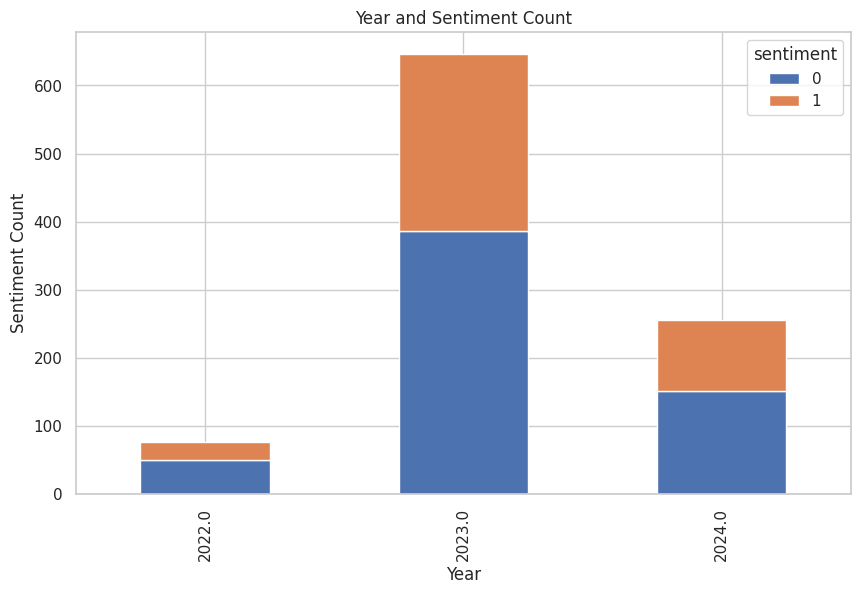

In [41]:
# Group by year and sentiment count
print("Plotting year and sentiment count...")
df.groupby(['date', 'sentiment'])['sentiment'].count().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Year and Sentiment Count')
plt.xlabel('Year')
plt.ylabel('Sentiment Count')
plt.show()

The above graph shows us how the sentiments are distributed in each of the years.

In [42]:
df['polarity'] = df['cleaned_text'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['cleaned_text'].astype(str).apply(len)
df['word_count'] = df['cleaned_text'].apply(lambda x: len(str(x).split()))

Generating histogram for sentiment polarity distribution...


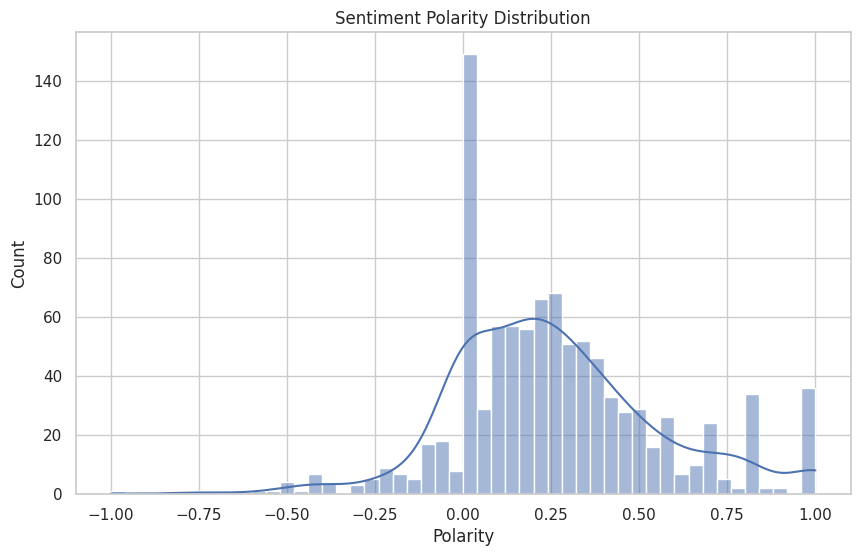

In [43]:
# Histograms for polarity and rating
print("Generating histogram for sentiment polarity distribution...")
plt.figure(figsize=(10, 6))
sns.histplot(df['polarity'], bins=50, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

From the sentiment polarity, we can see that most of the reviews are postive as the polarity values lies from 0 to 1

Generating histogram for review rating distribution...


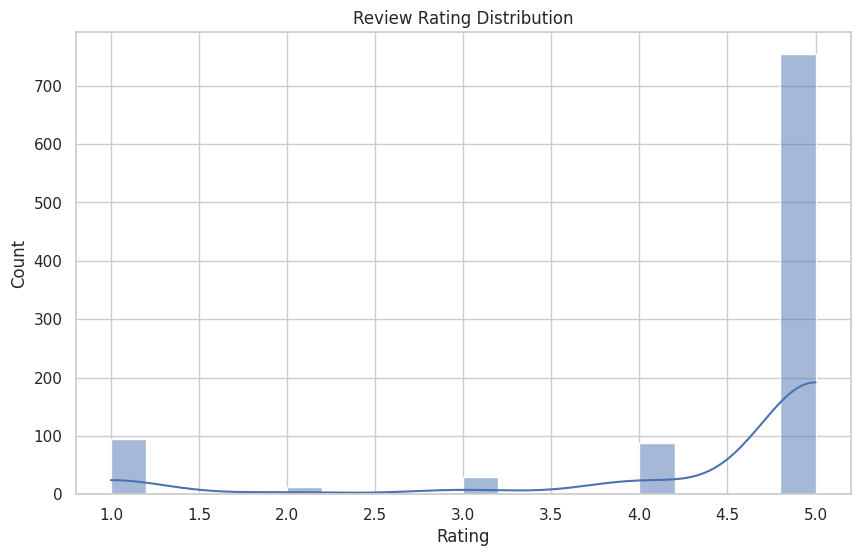

In [44]:
print("Generating histogram for review rating distribution...")
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Review Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

From the above, we can see that most of the rating is 4 to 5 and few disappointments for the product comes under 1

Generating bar charts for word frequency in positive and negative reviews...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


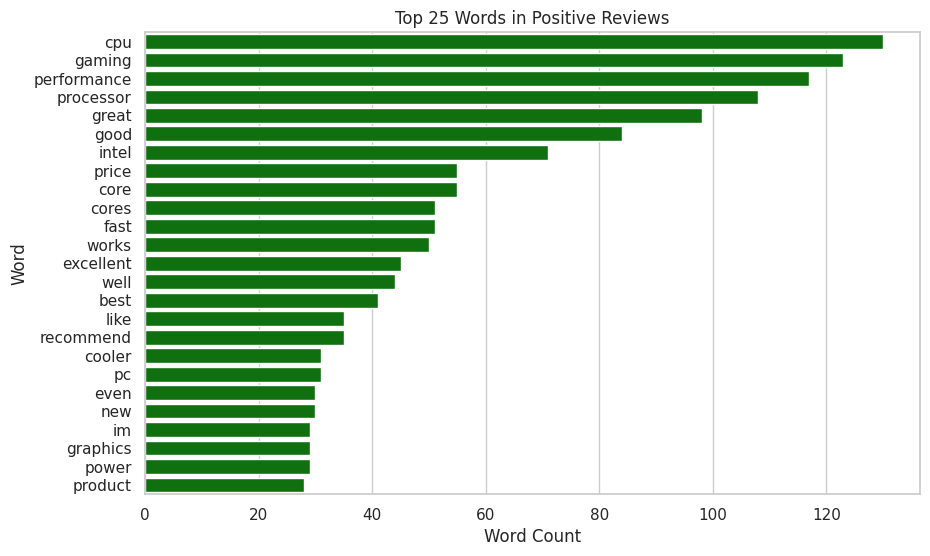

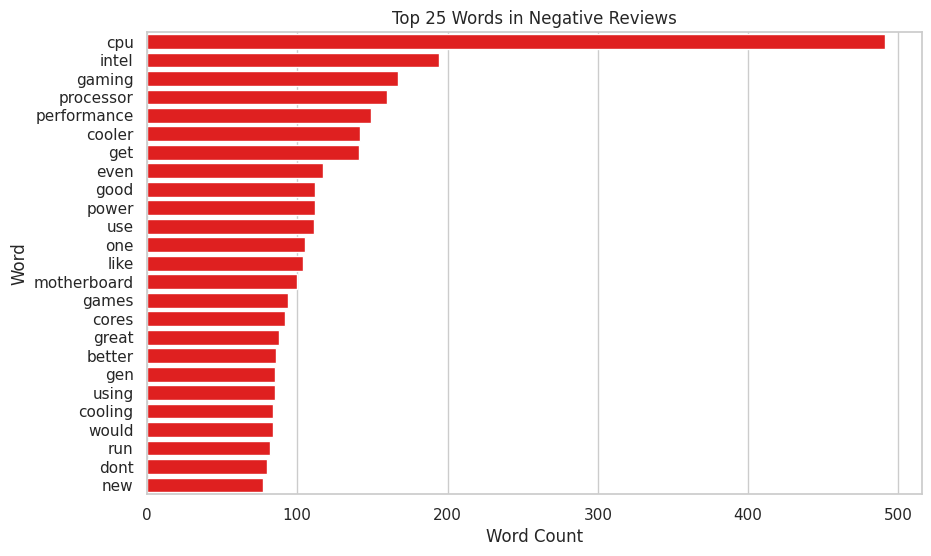

In [45]:
# Bar charts for word frequency
print("Generating bar charts for word frequency in positive and negative reviews...")
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

review_pos = df[df["sentiment"] == 1].dropna()
review_neg = df[df["sentiment"] == 0].dropna()

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split() if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

freq_dict_pos = defaultdict(int)
for sent in review_pos["cleaned_text"]:
    for word in generate_ngrams(sent):
        freq_dict_pos[word] += 1
fd_sorted_pos = pd.DataFrame(sorted(freq_dict_pos.items(), key=lambda x: x[1], reverse=True))
fd_sorted_pos.columns = ["word", "wordcount"]

freq_dict_neg = defaultdict(int)
for sent in review_neg["cleaned_text"]:
    for word in generate_ngrams(sent):
        freq_dict_neg[word] += 1
fd_sorted_neg = pd.DataFrame(sorted(freq_dict_neg.items(), key=lambda x: x[1], reverse=True))
fd_sorted_neg.columns = ["word", "wordcount"]

plt.figure(figsize=(10, 6))
sns.barplot(x='wordcount', y='word', data=fd_sorted_pos.head(25), color='green')
plt.title('Top 25 Words in Positive Reviews')
plt.xlabel('Word Count')
plt.ylabel('Word')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='wordcount', y='word', data=fd_sorted_neg.head(25), color='red')
plt.title('Top 25 Words in Negative Reviews')
plt.xlabel('Word Count')
plt.ylabel('Word')
plt.show()

Generating scatter plot for review length vs polarity...


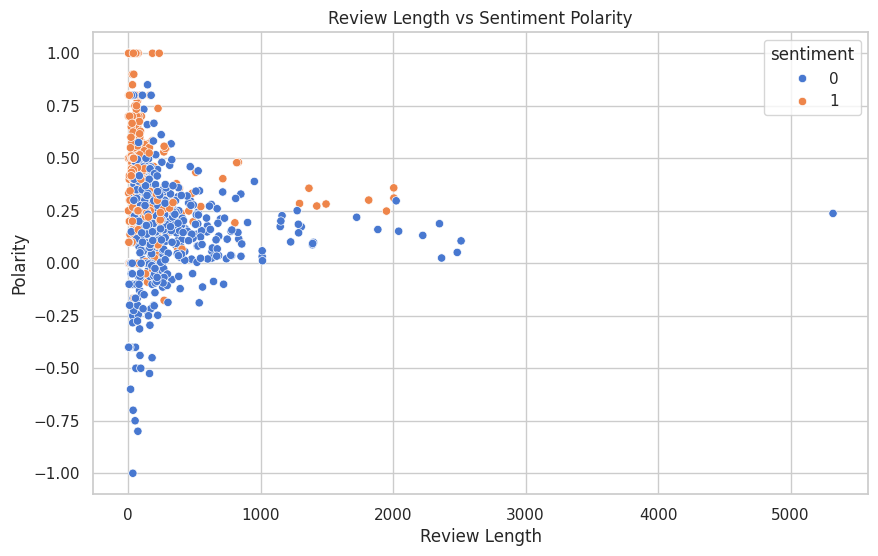

In [46]:
# Scatter plots for review length vs polarity and word count vs rating
print("Generating scatter plot for review length vs polarity...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_len', y='polarity', hue='sentiment', data=df, palette='muted')
plt.title('Review Length vs Sentiment Polarity')
plt.xlabel('Review Length')
plt.ylabel('Polarity')
plt.show()

From the above graph, we can see that positive polarity spreads from 0 to 1 and the negative polarilty spreads from -1 to 0 and the review length lies below 1000.

In [47]:
review_pos = df[df['sentiment'] == 1]
review_neg = df[df['sentiment'] == 0]

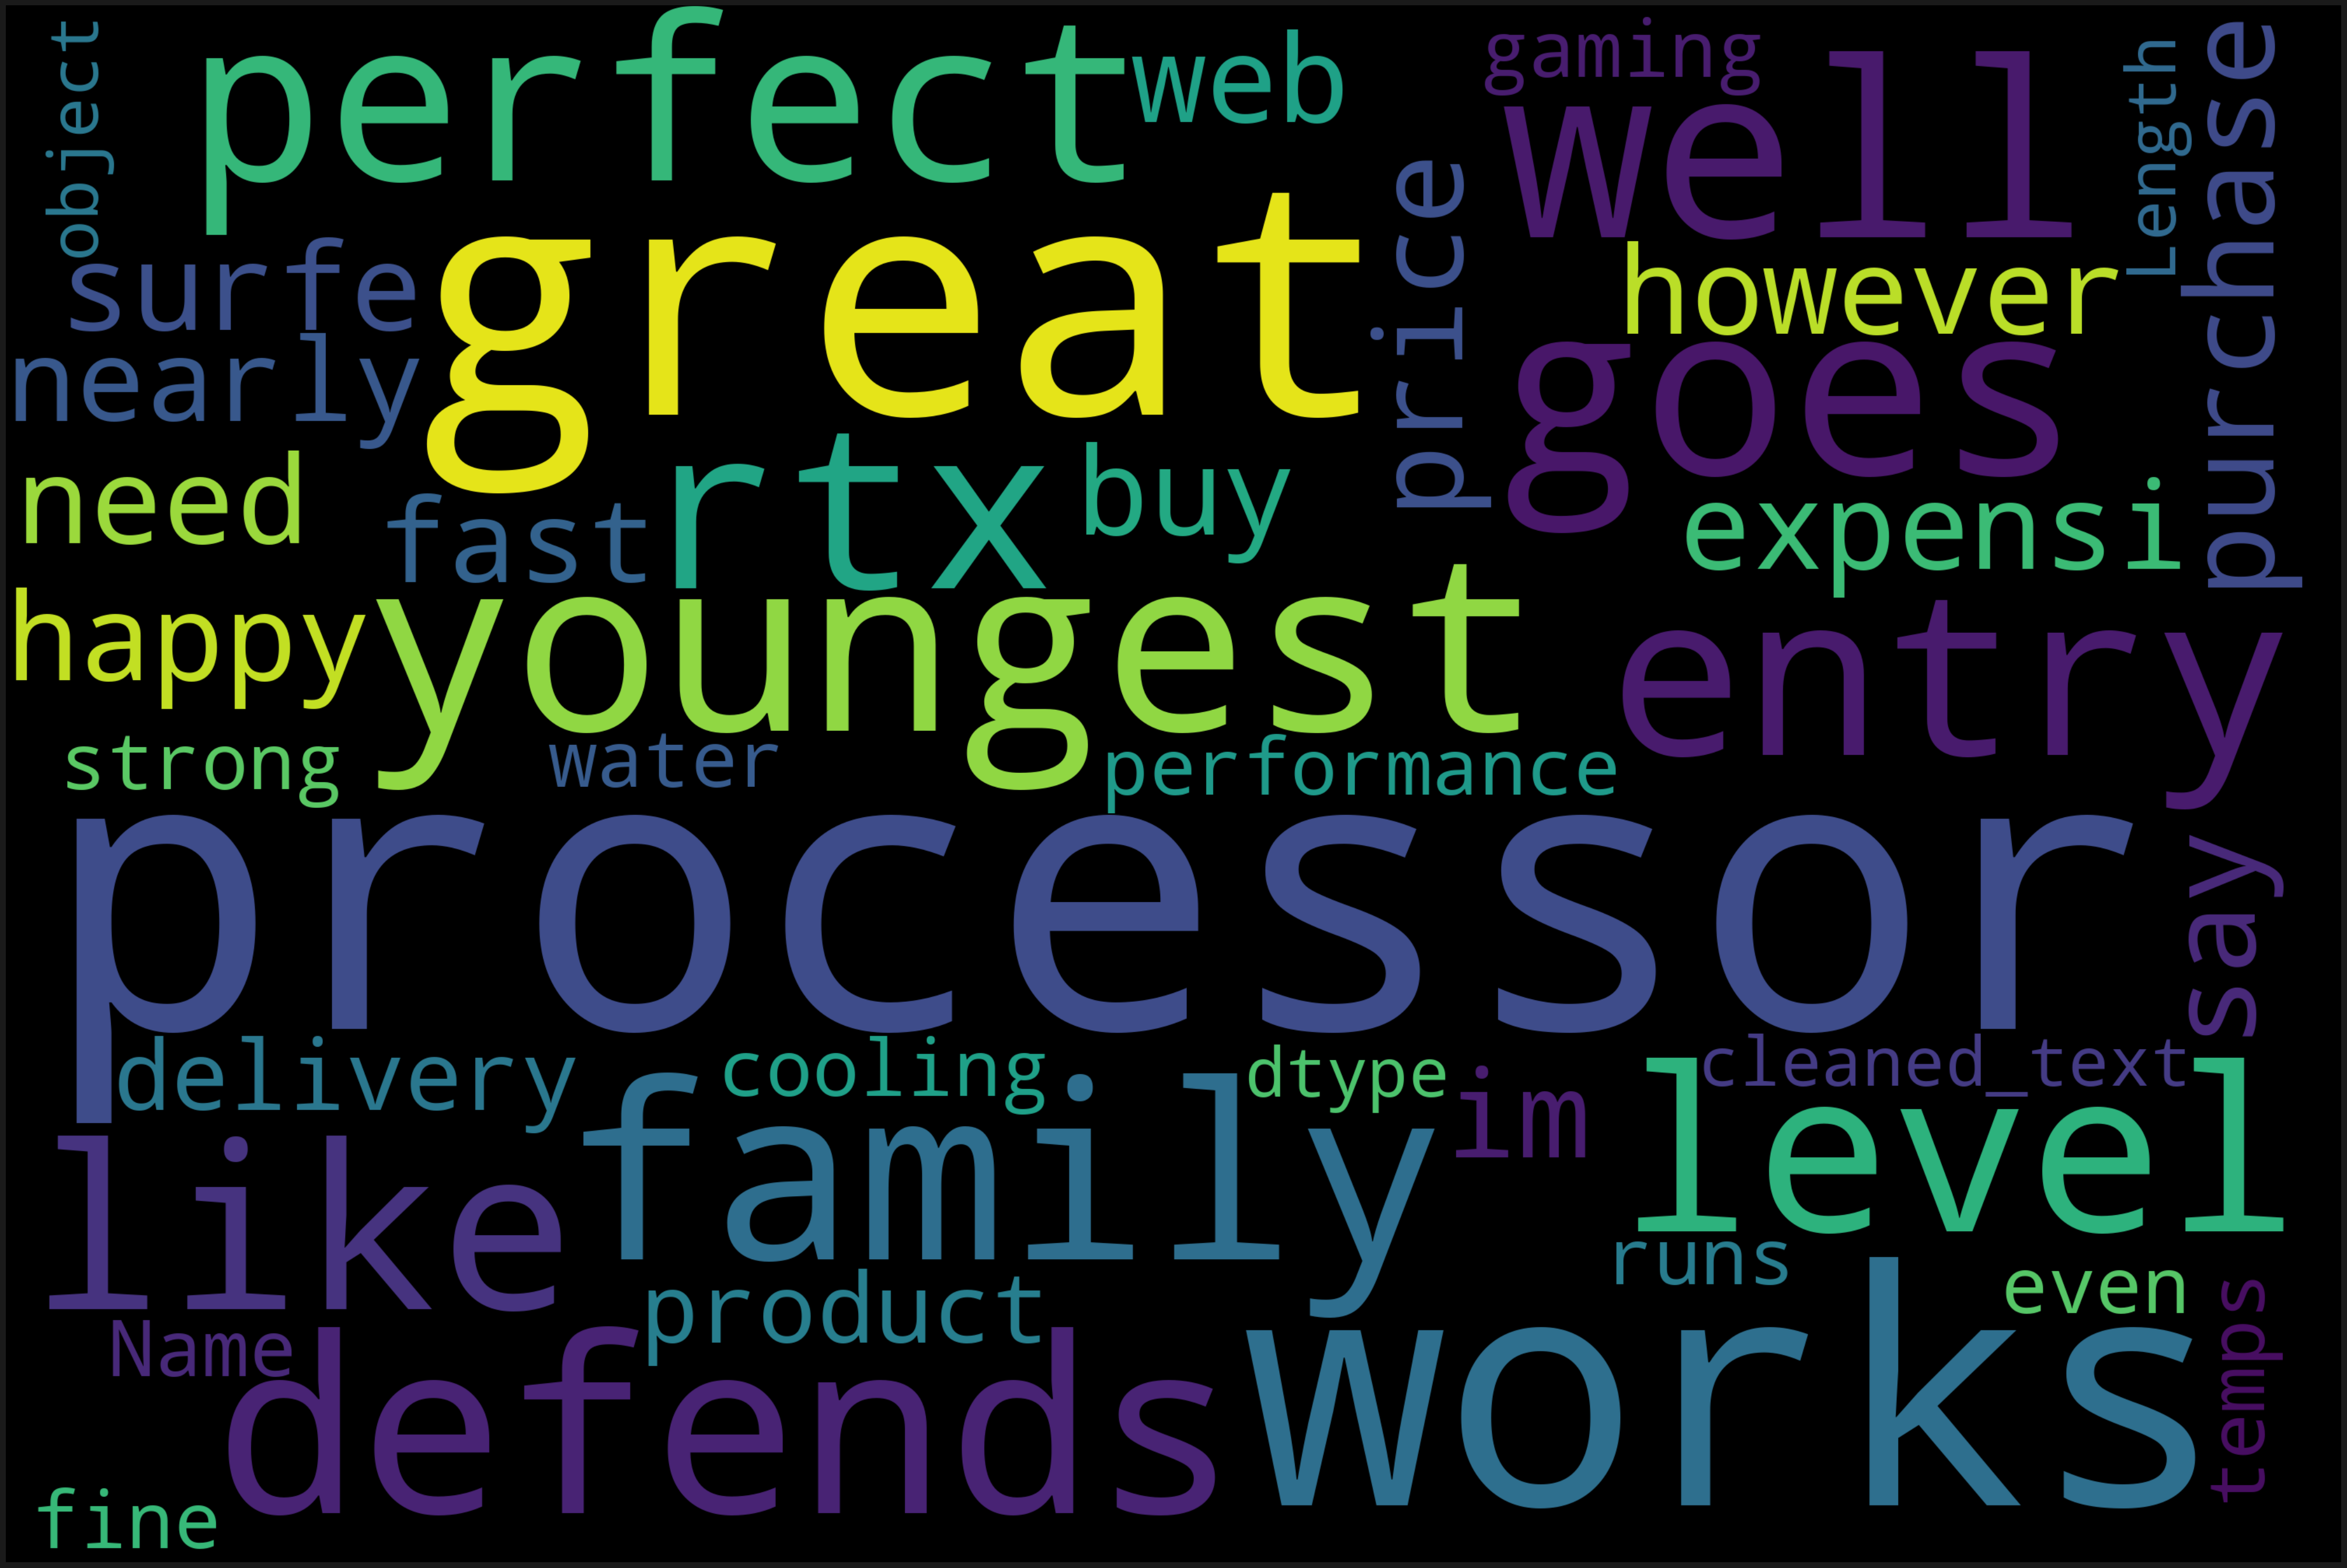

In [48]:
text = review_pos["cleaned_text"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

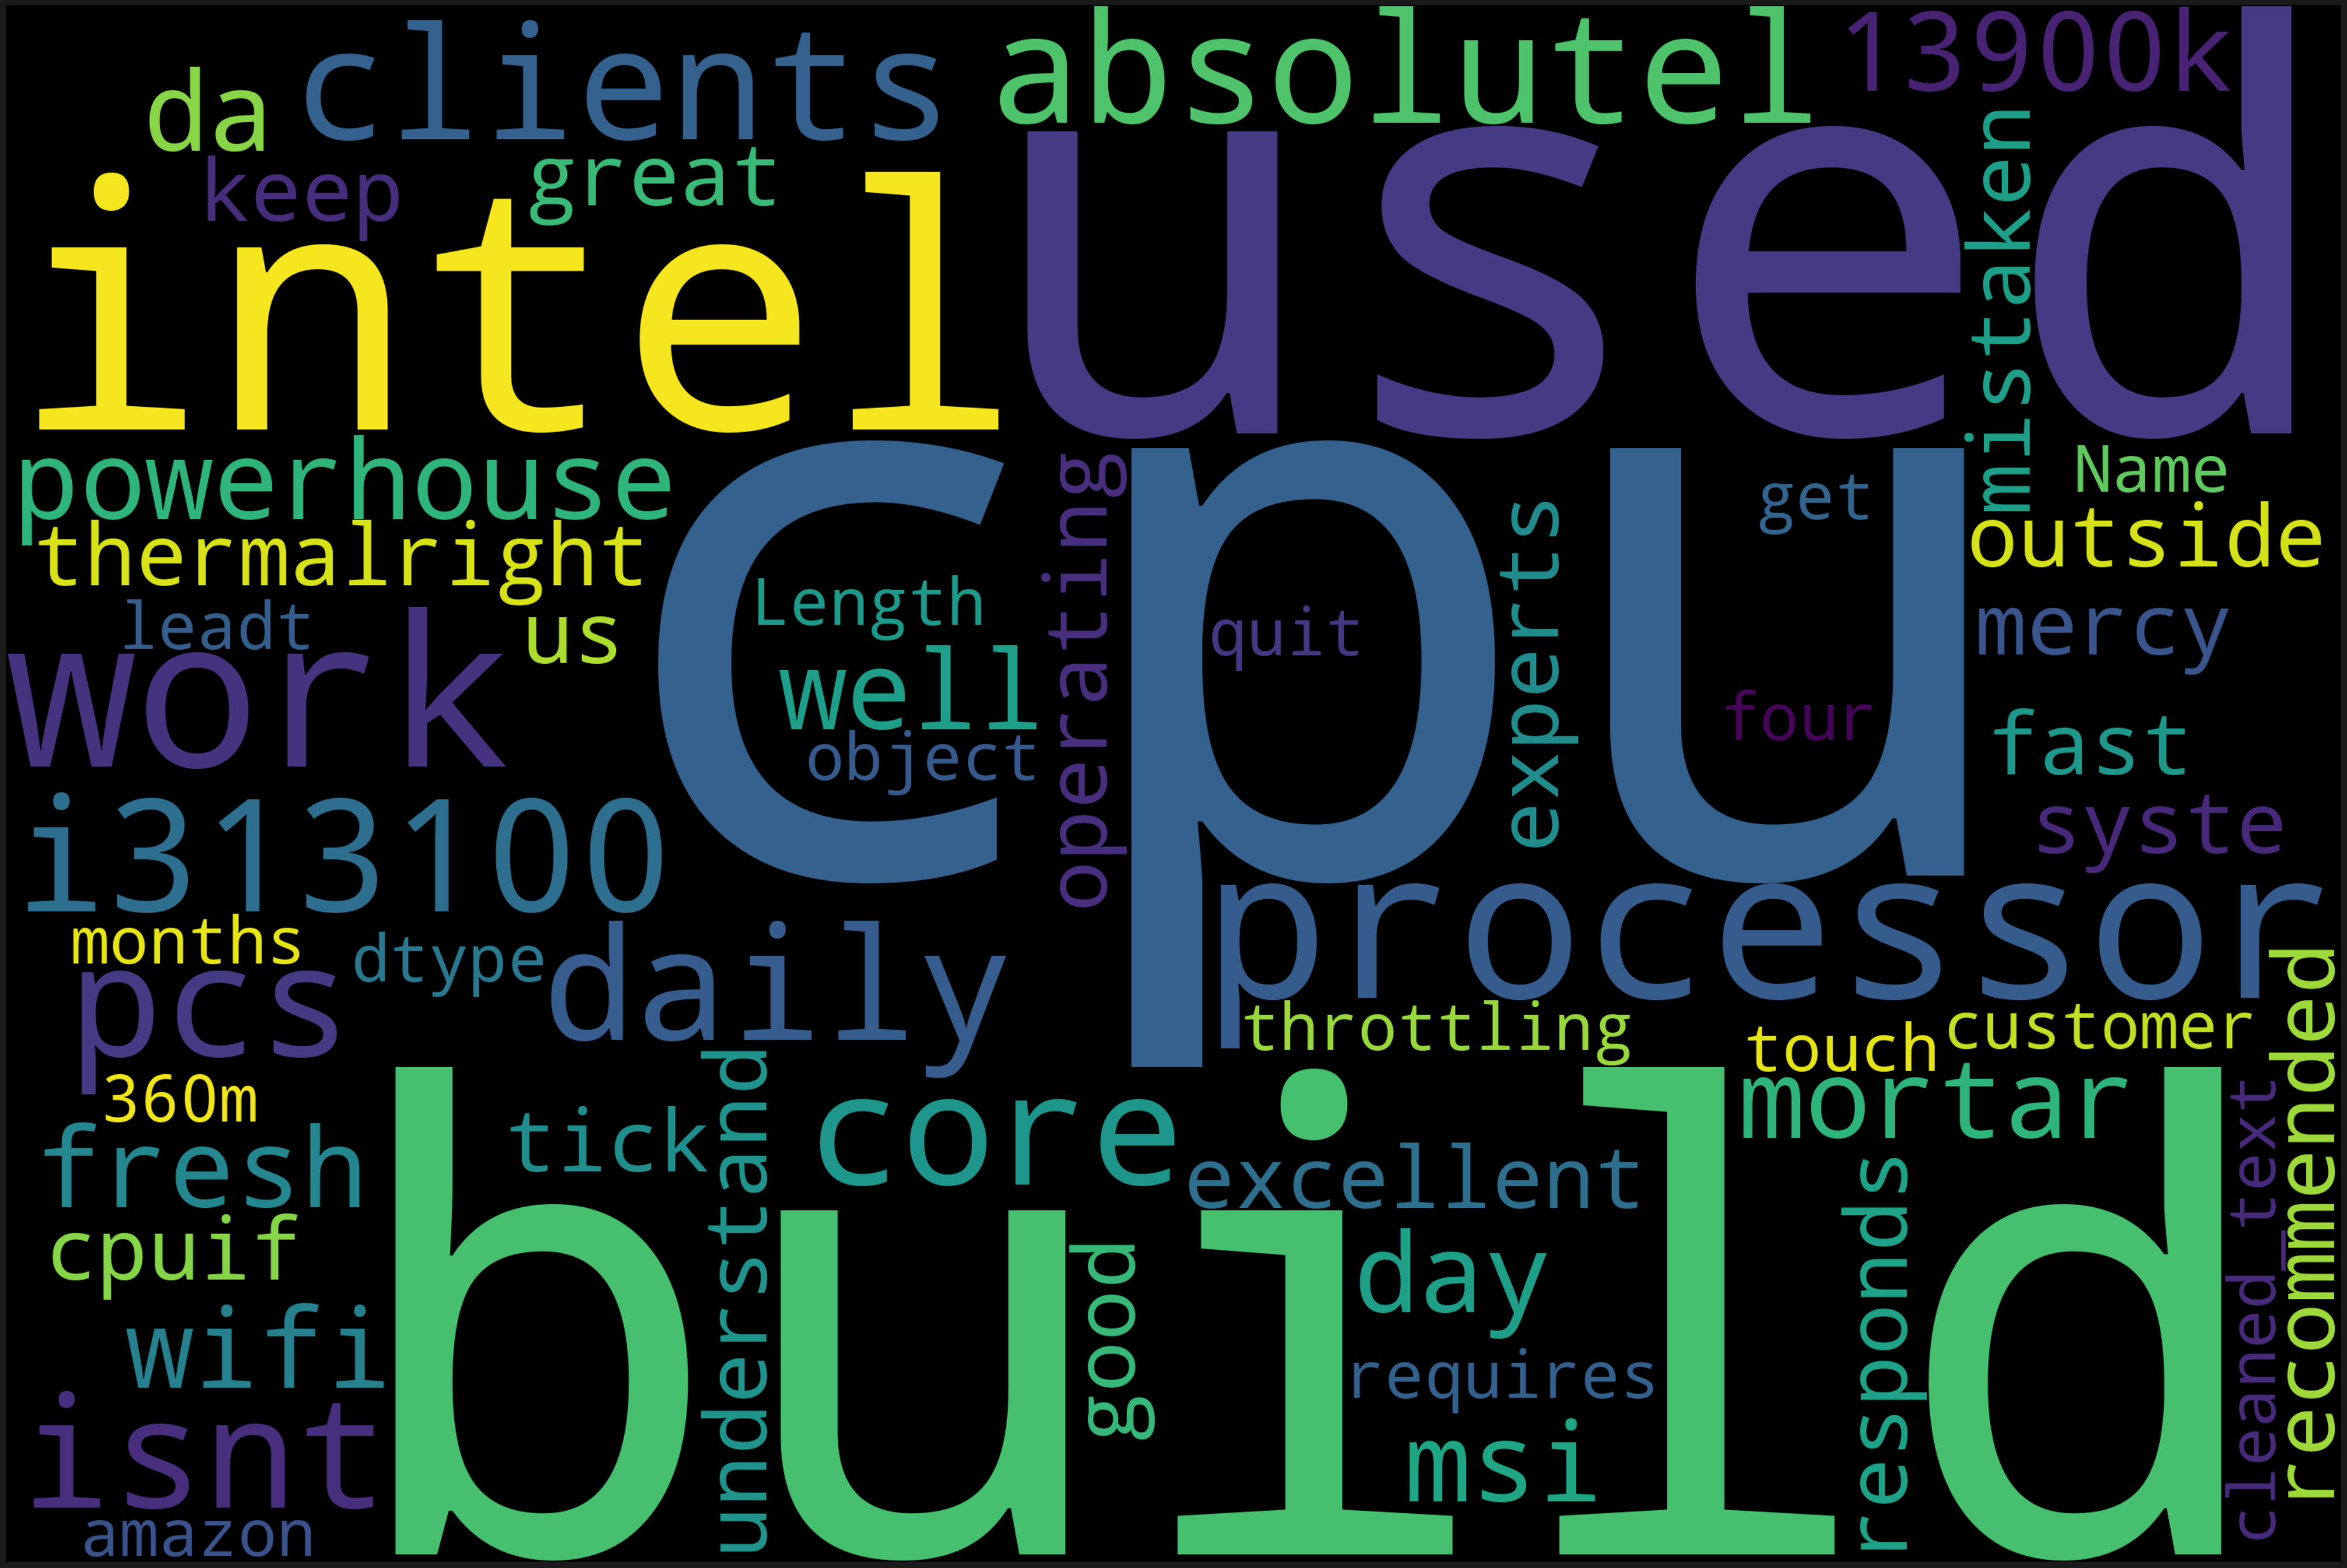

In [49]:
text = review_neg["cleaned_text"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Generating scatter plot for word count vs rating...


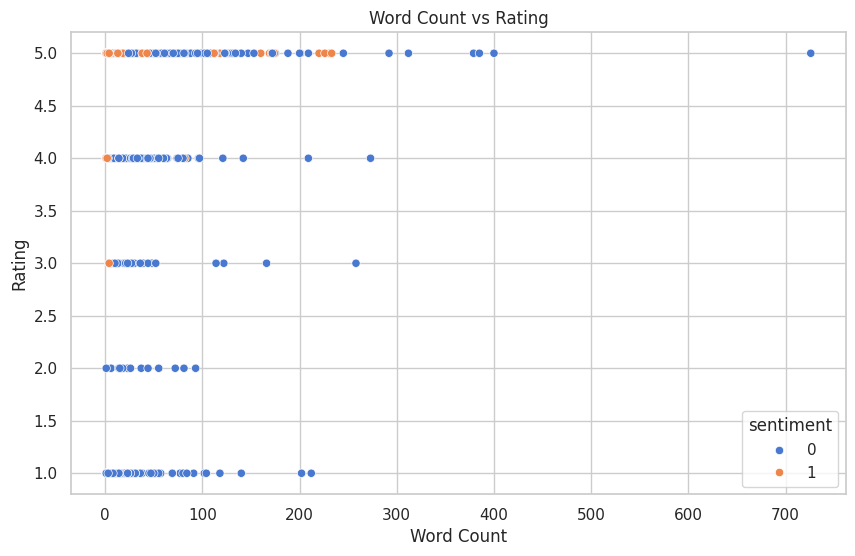

In [50]:
# Scatter plot for word count vs rating
print("Generating scatter plot for word count vs rating...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='rating', hue='sentiment', data=df, palette='muted')
plt.title('Word Count vs Rating')
plt.xlabel('Word Count')
plt.ylabel('Rating')
plt.show()

From the above graph, we can see that people who wrote negative reviews used more words for their reviews than the ones who wrote positive reviews.

Generating pairplot for numerical variables...


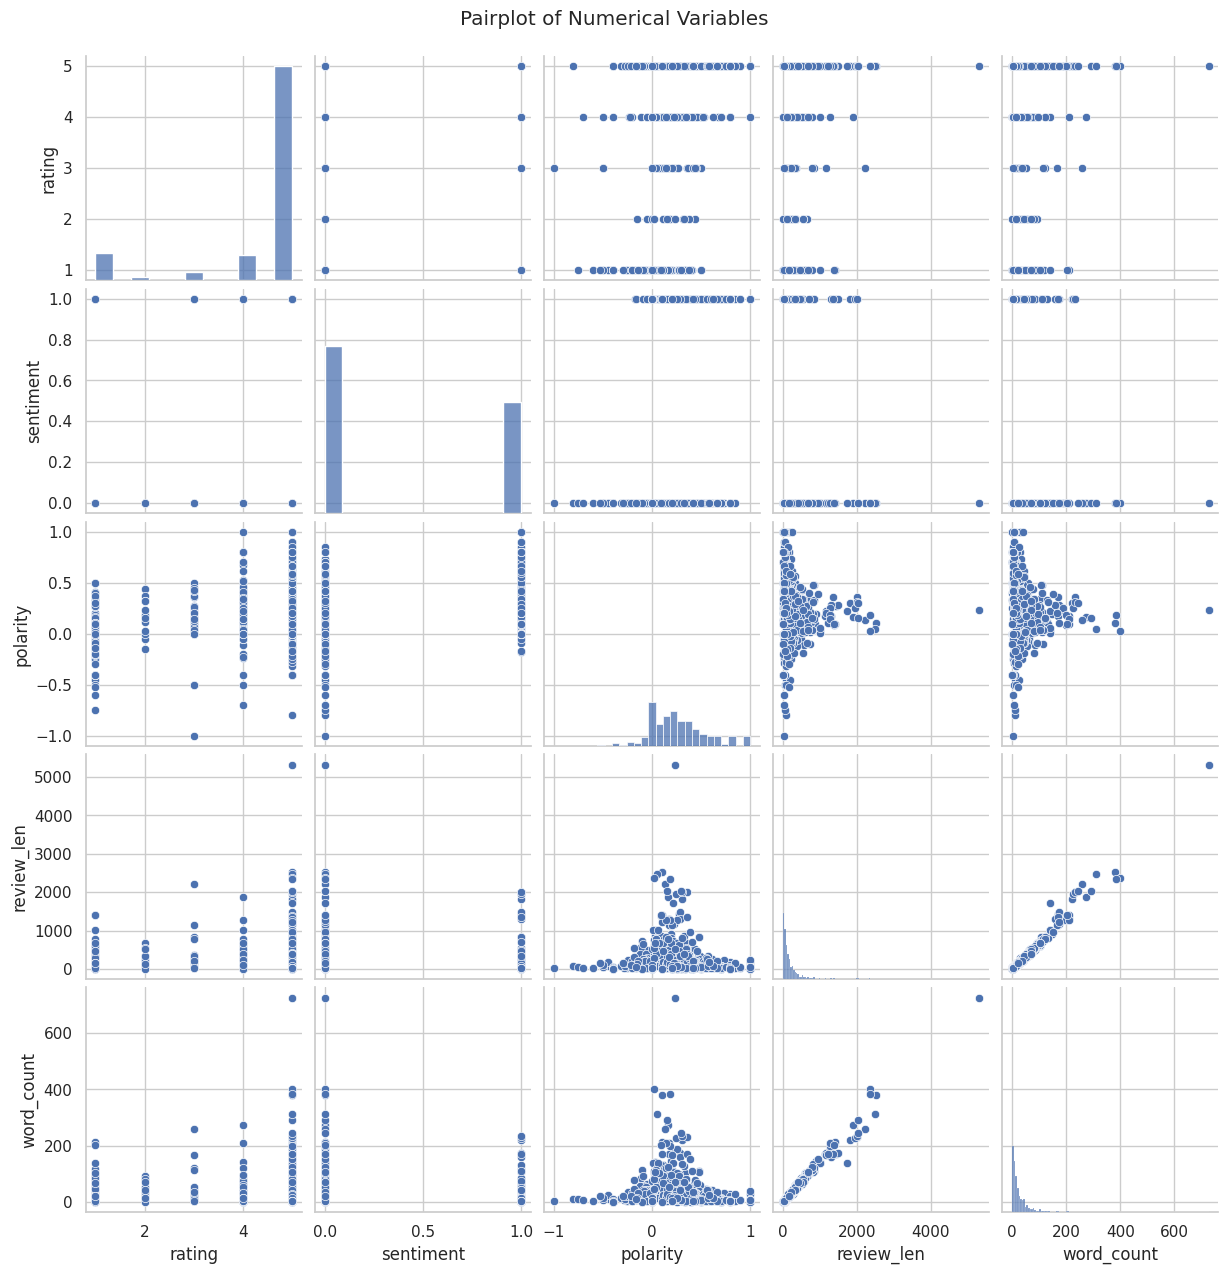

In [51]:
# Pairplot for numerical variables
print("Generating pairplot for numerical variables...")
sns.pairplot(df[['rating', 'sentiment', 'polarity', 'review_len', 'word_count']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

From the above pairplot, we can see that review_length and word count has a linear relationship between them.

Generating heatmap for correlation matrix...


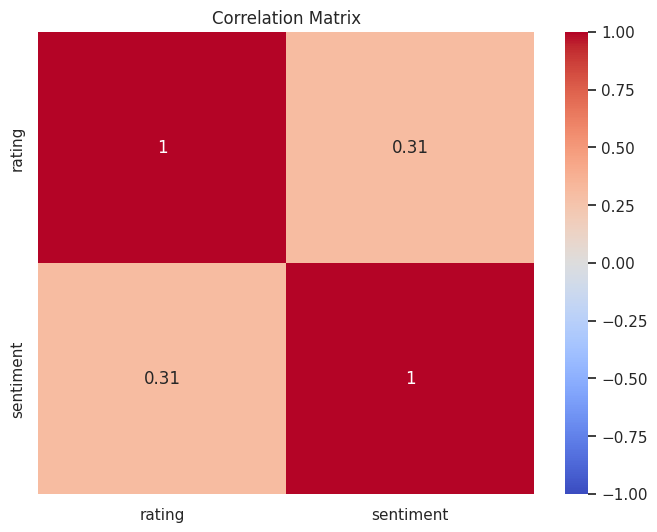

In [52]:
# Heatmap for correlation matrix
print("Generating heatmap for correlation matrix...")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

From the above graph, we cansee that sentiment and rating are weekly correlated.

Generating box plot for polarity distribution by sentiment...


<ipython-input-53-1f7755ce736d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='polarity', data=df, palette='muted')


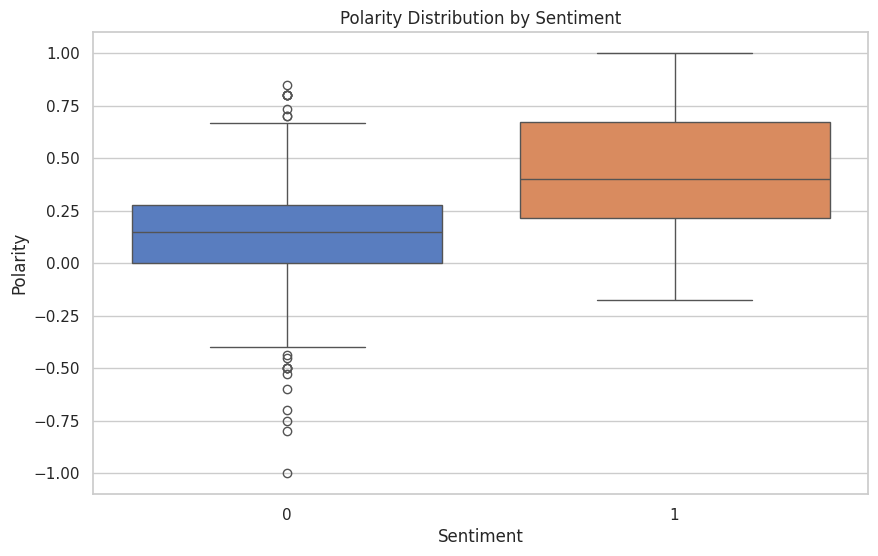

In [53]:
# Box plot for polarity distribution by sentiment
print("Generating box plot for polarity distribution by sentiment...")
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='polarity', data=df, palette='muted')
plt.title('Polarity Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Polarity')
plt.show()


From the above graph, we can see that the negative reviews has polarity spread between 0 and 0.25 and it has outliers in -1 and 0 and the positive reviews are spread between 0.25 and 0.75.

Generating distribution plot of review length by sentiment...


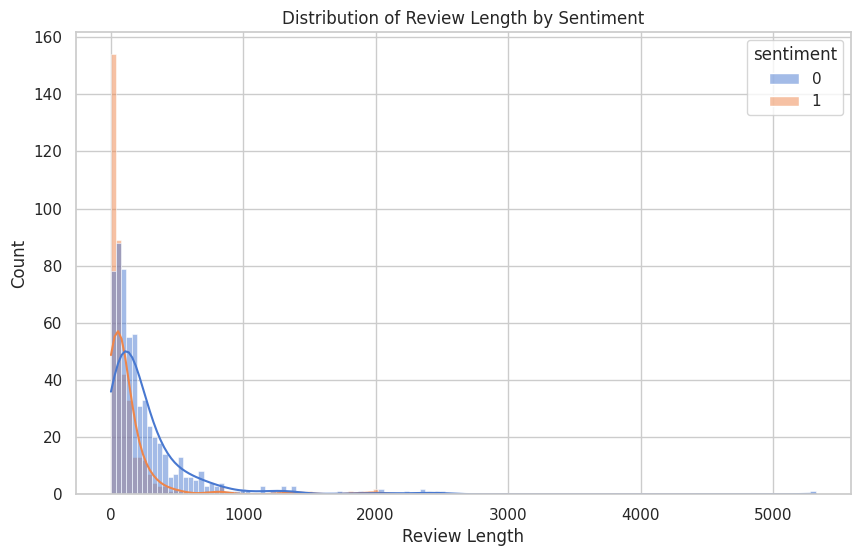

In [54]:
# Distribution of review length by sentiment
print("Generating distribution plot of review length by sentiment...")
plt.figure(figsize=(10, 6))
sns.histplot(df, x='review_len', hue='sentiment', kde=True, palette='muted')
plt.title('Distribution of Review Length by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

From the above graph, we can see that most of the positive reviews are of less words and the negative reviews are of more words which means they explained more in specific what the problem is.

Generating distribution plot of word count by sentiment...


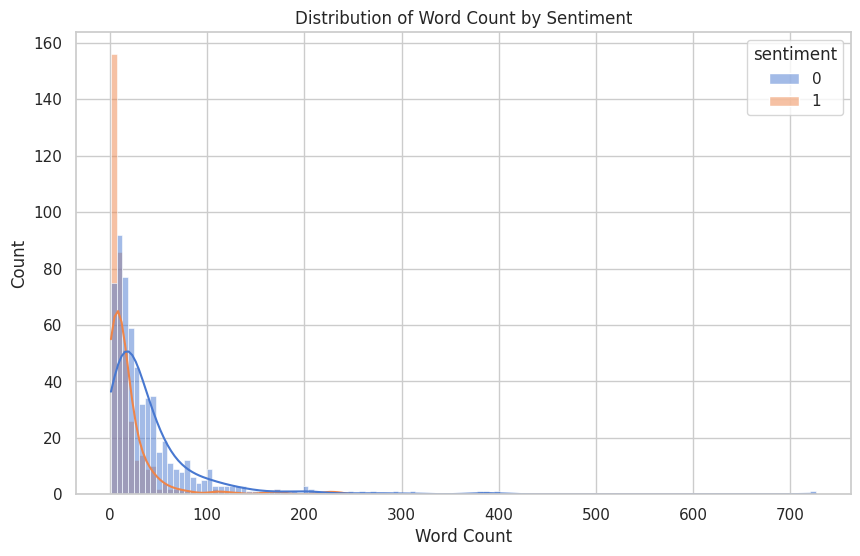

In [55]:
# Distribution of word count by sentiment
print("Generating distribution plot of word count by sentiment...")
plt.figure(figsize=(10, 6))
sns.histplot(df, x='word_count', hue='sentiment', kde=True, palette='muted')
plt.title('Distribution of Word Count by Sentiment')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.show()

Again from the above graph, we can see that positive reviws has less words.

Generating distribution plot of polarity by sentiment...


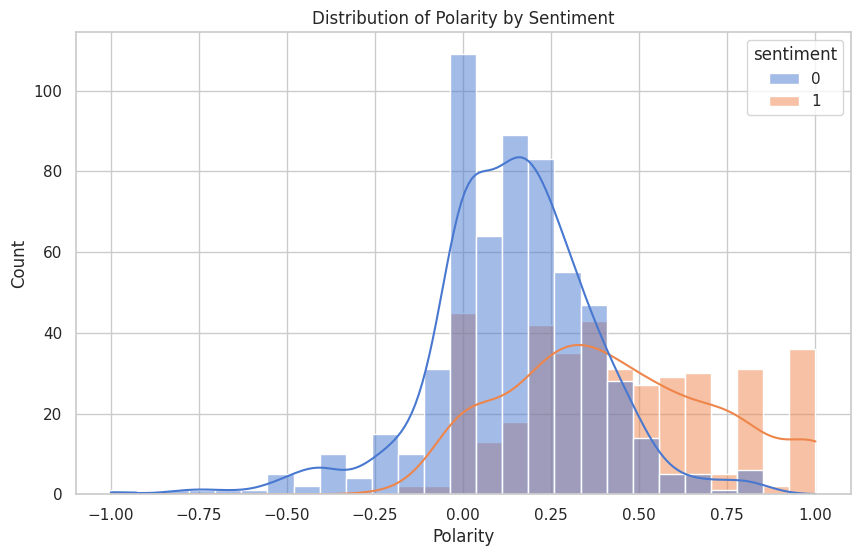

In [56]:
# Distribution of polarity by sentiment
print("Generating distribution plot of polarity by sentiment...")
plt.figure(figsize=(10, 6))
sns.histplot(df, x='polarity', hue='sentiment', kde=True, palette='muted')
plt.title('Distribution of Polarity by Sentiment')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

From the above graph, we can see that most of the sentiment polarity lies between 0 to 0.5 both for posotive and negative reviews.

In [57]:
print("All visualizations completed successfully.")

All visualizations completed successfully.


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [59]:
# Step 1: Prepare the data
X = df['cleaned_text']
y = df['sentiment']

In [60]:
# Step 2: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

# Tokenize text
max_features = 5000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X_train)
X_train_lstm = tokenizer.texts_to_sequences(X_train)
X_test_lstm = tokenizer.texts_to_sequences(X_test)

# Padding sequences
max_len = max(len(x) for x in X_train_lstm)
X_train_lstm = pad_sequences(X_train_lstm, padding='post', maxlen=max_len)
X_test_lstm = pad_sequences(X_test_lstm, padding='post', maxlen=max_len)

# LSTM model architecture
lstm_model = Sequential()
lstm_model.add(Embedding(max_features, 128, input_length=max_len))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile and train the LSTM model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=64, validation_data=(X_test_lstm, y_test))

# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test)
print(f"LSTM Model Accuracy: {lstm_accuracy}")

Epoch 1/10
13/13 [==============================] - 65s 5s/step - loss: 0.6744 - accuracy: 0.5977 - val_loss: 0.6864 - val_accuracy: 0.5816
Epoch 2/10
13/13 [==============================] - 68s 5s/step - loss: 0.6722 - accuracy: 0.6054 - val_loss: 0.6798 - val_accuracy: 0.5816
Epoch 3/10
13/13 [==============================] - 43s 3s/step - loss: 0.6740 - accuracy: 0.6054 - val_loss: 0.6831 - val_accuracy: 0.5816
Epoch 4/10
13/13 [==============================] - 45s 4s/step - loss: 0.6720 - accuracy: 0.6054 - val_loss: 0.6798 - val_accuracy: 0.5816
Epoch 5/10
13/13 [==============================] - 48s 4s/step - loss: 0.6727 - accuracy: 0.6054 - val_loss: 0.6799 - val_accuracy: 0.5816
Epoch 6/10
13/13 [==============================] - 48s 4s/step - loss: 0.6710 - accuracy: 0.6054 - val_loss: 0.6825 - val_accuracy: 0.5816
Epoch 7/10
13/13 [==============================] - 45s 3s/step - loss: 0.6720 - accuracy: 0.6054 - val_loss: 0.6807 - val_accuracy: 0.5816
Epoch 8/10
13/13 [==

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Naive Bayes model
nb_model = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB()),
])

# Train and evaluate Naive Bayes model
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Model Accuracy: {nb_accuracy}")


Naive Bayes Model Accuracy: 0.7551020408163265


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# SVM model
svm_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='linear')),
])

# Train and evaluate SVM model
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Model Accuracy: {svm_accuracy}")


SVM Model Accuracy: 0.7908163265306123


In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Tokenization
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
encodings = tokenizer(df['cleaned_text'].tolist(), truncation=True, padding=True)

# Step 2: Convert to PyTorch Dataset
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Assuming labels are already defined
labels = df['sentiment'].tolist()

# Step 3: Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(df['cleaned_text'], labels, test_size=0.2, random_state=42)

train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True)

train_dataset = SentimentDataset(train_encodings, train_labels)
val_dataset = SentimentDataset(val_encodings, val_labels)

# Step 4: Model Training
training_args = TrainingArguments(
    output_dir='./results',          # Output directory
    per_device_train_batch_size=8,   # Batch size for training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    num_train_epochs=3,              # Number of training epochs
    logging_dir='./logs',            # Directory for storing logs
    logging_steps=10,                # Number of steps for logging
    eval_strategy="epoch",           # Evaluation strategy to use
    save_strategy="no",              # Save strategy to use
)

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

trainer = Trainer(
    model=model,
    args=training_args

    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=lambda p: {'accuracy': accuracy_score(p.predictions.argmax(-1), p.label_ids)}
)

trainer.train()

# Step 5: Evaluation
eval_results = trainer.evaluate(eval_dataset=val_dataset)
print(f"Accuracy: {eval_results['eval_accuracy']}")
print(classification_report(val_labels, trainer.predict(val_dataset).predictions.argmax(-1)))


Accuracy: 0.8928571428571429


In [66]:
bert_accuracy = eval_results['eval_accuracy']
bert_accuracy

0.8928571428571429

In [67]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Random Forest model
rf_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier()),
])

# Train and evaluate Random Forest model
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Model Accuracy: {rf_accuracy}")

# Gradient Boosting model
gb_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', GradientBoostingClassifier()),
])

# Train and evaluate Gradient Boosting model
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f"Gradient Boosting Model Accuracy: {gb_accuracy}")


Random Forest Model Accuracy: 0.7551020408163265
Gradient Boosting Model Accuracy: 0.7653061224489796


<ipython-input-68-c3b615a124bf>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')


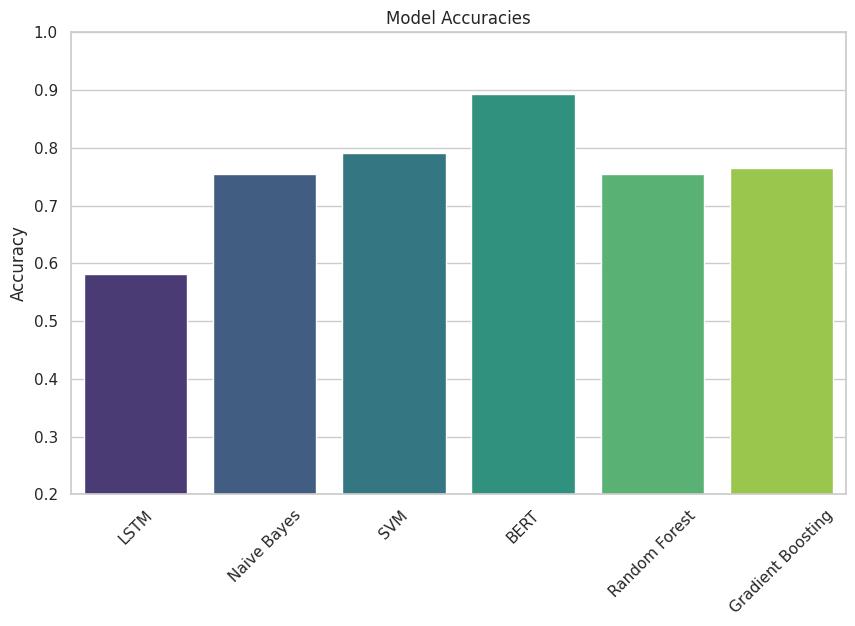

In [68]:
# Comparing accuracies
model_accuracies = {
    'LSTM': lstm_accuracy,
    'Naive Bayes': nb_accuracy,
    'SVM': svm_accuracy,
    'BERT': bert_accuracy,
    'Random Forest': rf_accuracy,
    'Gradient Boosting': gb_accuracy,

}

# Plotting accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0.2, 1.0)
plt.xticks(rotation=45)
plt.show()


We compared all the models and this makes the BERT model best for sentiment analysis for intel product.